<a href="https://colab.research.google.com/github/MoutazMohamed0/Data201/blob/main/DATA_201_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Analysis of Contagious Disease in the United States (1928–2011)**

Asma Abbas

Cody Paulay-Simmons

Ike Charistan Depenyou

Moutaz Mohamed

Professor Abdirisak Mohamed

Data 201

##Section 1: Introduction

For this project we used a dataset from Professor Rachel Saidi's Dataset Collection (https://drive.google.com/drive/folders/1AMRfddeMwKRaNidOV87JP1iCVn_z-Uv_). This dataset tracks the rate of various contagious disease cases namely Hepatitis A, Measles, Mumps, Pertussis, Polio, Rubella, and Smallpox across all U.S. states over the years 1928-2011. The dataset has 18870 rows and 6 columns representing the name of the disease, the name of the state, the year the data was collected, the number of weeks that data was reported in that given year, the reported case count, and the state's population during that year. This dataset offers valuable information that can be utilized to better understand and explore trends in the rates of contagious disease across the country over time.

Some questions that we are interested in exploring are:

* Has the reported rate of contagious disease changed over time?

* Which states have had the highest and lowest rates of contagious disease (over the entire lifespan of the dataset)?

* How have reported rate of contagious disease varied in certain given years (1950, 1970, and 2000)?

* Is there any relationship between population size and total reported cases of disease?




##Section 2: Data Wrangeling

In [ ]:
## Prepare and Wrangle Data using Panda and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MoutazMohamed0/Data201/refs/heads/main/us_contagious_diseases.csv')

In [ ]:
print(df.head())

       disease    state  year  weeks_reporting  count  population
0  Hepatitis A  Alabama  1966               50    321   3345787.0
1  Hepatitis A  Alabama  1967               49    291   3364130.0
2  Hepatitis A  Alabama  1968               52    314   3386068.0
3  Hepatitis A  Alabama  1969               49    380   3412450.0
4  Hepatitis A  Alabama  1970               51    413   3444165.0


In [ ]:
# What are the variables measured in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   disease          18870 non-null  object 
 1   state            18870 non-null  object 
 2   year             18870 non-null  int64  
 3   weeks_reporting  18870 non-null  int64  
 4   count            18870 non-null  int64  
 5   population       18666 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 884.7+ KB


In [ ]:
df.describe()

,year,weeks_reporting,count,population
count,18870.000000,18870.000000,18870.000000,1.866600e+04
mean,1974.100000,33.281558,1367.530578,4.242911e+06
std,21.776419,20.105653,5506.530241,4.804728e+06
min,1928.000000,0.000000,0.000000,8.685300e+04
25%,1956.000000,14.000000,1.000000,1.046542e+06
50%,1977.000000,44.000000,47.000000,2.824918e+06
75%,1992.000000,50.000000,440.750000,5.153640e+06
max,2011.000000,52.000000,132342.000000,3.760752e+07


In [ ]:
# The size and shape of the dataset
df.shape

(18870, 6)

In [ ]:
# Which diseases were reported on as part of the dataset
print (df['disease'].unique())

['Hepatitis A' 'Measles' 'Mumps' 'Pertussis' 'Polio' 'Rubella' 'Smallpox']


##Section 3: EDA & Data Visualization

In [ ]:
# For context the largest states by population historically (mean of all years (1928-2011) rounded to whole numbers)
state_pop_mean = df.groupby('state', as_index=False)['population'].mean()
state_pop_mean['population'] = state_pop_mean['population'].round().astype(int)
top_states_pops = state_pop_mean.sort_values(by='population', ascending=False).head(10)
print(top_states_pops)

             state  population
4       California    21995604
32        New York    17106064
43           Texas    13618712
38    Pennsylvania    11498673
13        Illinois    10721519
35            Ohio     9983999
9          Florida     9014146
22        Michigan     8369796
30      New Jersey     6817884
33  North Carolina     5764265


In [ ]:
# For context the smallest states by population historically (mean of all years (1928-2011) rounded to whole numbers)
bottom_states_pops = state_pop_mean.sort_values(by='population', ascending=True).head(10)
bottom_states_pops['population'] = bottom_states_pops['population'].round().astype(int)
print(bottom_states_pops)

                   state  population
50               Wyoming      393698
1                 Alaska      471616
45               Vermont      485752
7               Delaware      556303
34          North Dakota      639336
8   District Of Columbia      663111
41          South Dakota      694104
26               Montana      741010
29         New Hampshire      866236
12                 Idaho      883126


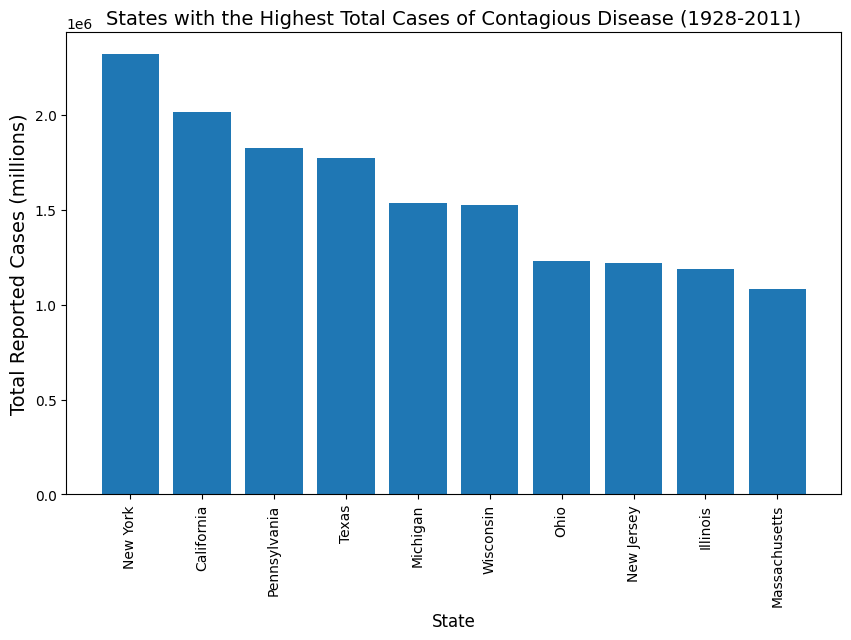

In [ ]:
## Bar Graph 1 (10 States with the Highest Total Disease Cases (1928-2011))
state_totals = df.groupby('state', as_index=False)['count'].sum()
top10_states = state_totals.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top10_states['state'], top10_states['count'])
plt.title('States with the Highest Total Cases of Contagious Disease (1928-2011)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Reported Cases (millions)', fontsize=14)
plt.xticks(rotation=90)

plt.show()

This graph displays the 10 states with the most reported cases of contagious disease over the entire lifetime of the dataset (1928-2011). This list in order includes New York, California, Pennsylvania, Texas, Michigan, Wisconsin, Ohio, New Jersey, Illinois, and Massachusetts. Of the 10 states that reported the highest number of contagious disease cases, eight are among the ten most populous states historically with the only exceptions being Wisconsin and Massachusetts. This may give us some insight on the relationship between state population and the number of reported cases of contagious disease over the lifespan of the dataset.

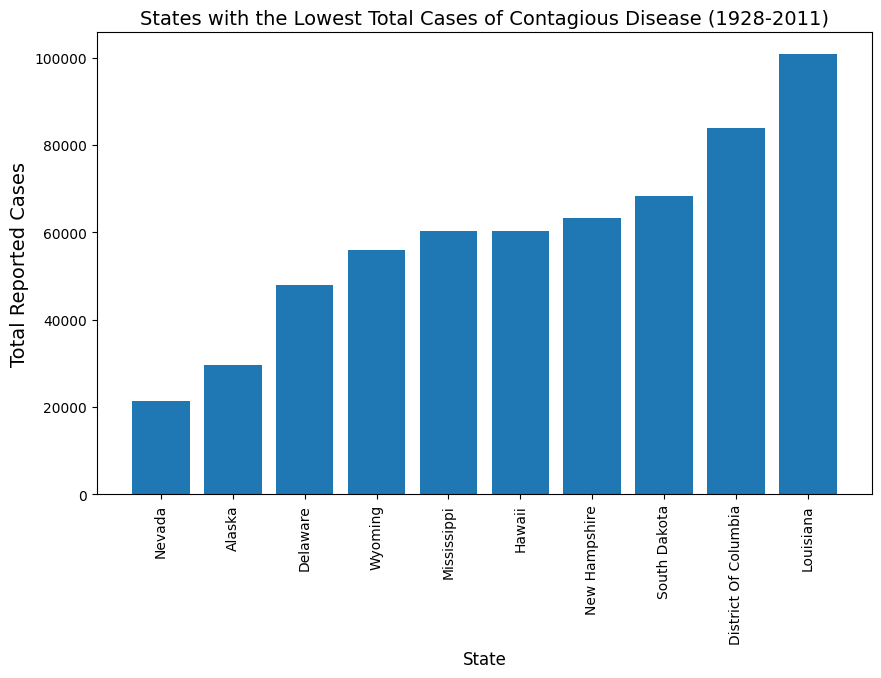

In [ ]:
## Bar Graph 2 (10 States with the Lowest Total Disease Cases (1928-2011))
bottom10_states = state_totals.sort_values(by='count', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(bottom10_states['state'], bottom10_states['count'])
plt.title('States with the Lowest Total Cases of Contagious Disease (1928-2011)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Reported Cases', fontsize=14)
plt.xticks(rotation=90)

plt.show()

This graph displays the 10 states with the least reported cases of contagious disease over the entire lifetime of the dataset (1928-2011). This list in order includes Nevada, Alaska, Delaware, Wyoming, Mississippi, Hawaii, New Hampshire, South Dakota, D.C., and Louisiana. Of the 10 states that reported the fewest number of contagious disease cases, six are among the ten least populous states historically with the four exceptions being Nevada, Mississippi, Hawaii, and Louisiana. This may further give us some insight on the relationship between state population and the number of reported cases of contagious disease over the lifespan of the dataset.

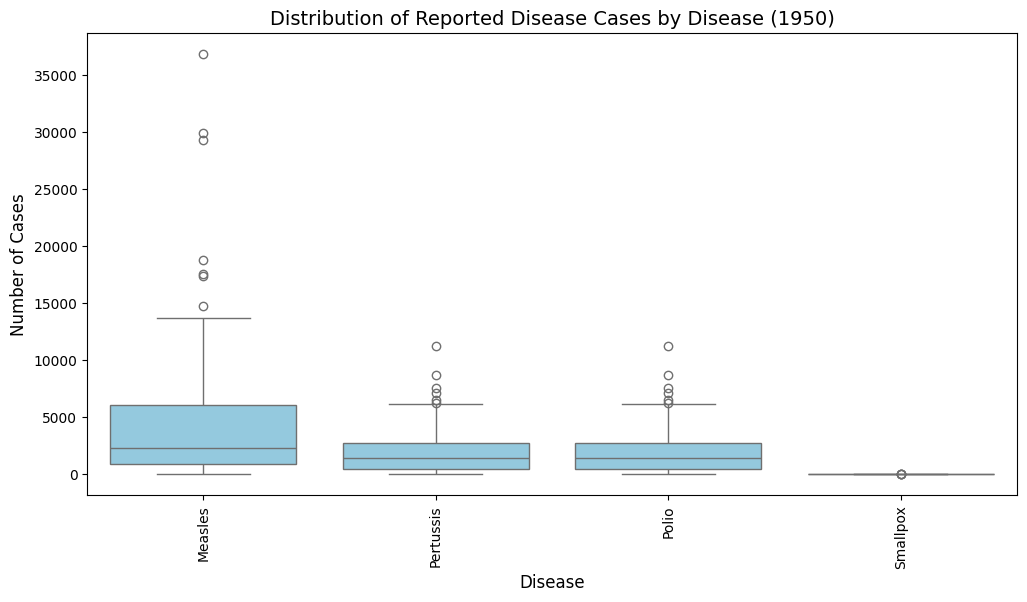

In [ ]:
## Boxplot 1 (Distribution of Reported Cases 1950)
df_1950 = df[df['year'] == 1950]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1950, x='disease', y='count', color='skyblue')
plt.title('Distribution of Reported Disease Cases by Disease (1950)', fontsize=14)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=90)

plt.show()

This box plot shows the distribution of reported contagious disease cases in 1950 for four diseases, Measles, Pertussis, Polio, and Smallpox. Measles shows the highest number of cases, with one outlier exceeding 35000 cases, indicating that it was the most prevalent contagious disease reported in 1950. Pertussis and Polio show a smaller number of cases, with both having outliers of less than 15000. Smallpox reports the fewest number of cases, as it was already nearly eradicated in the United States by 1949.

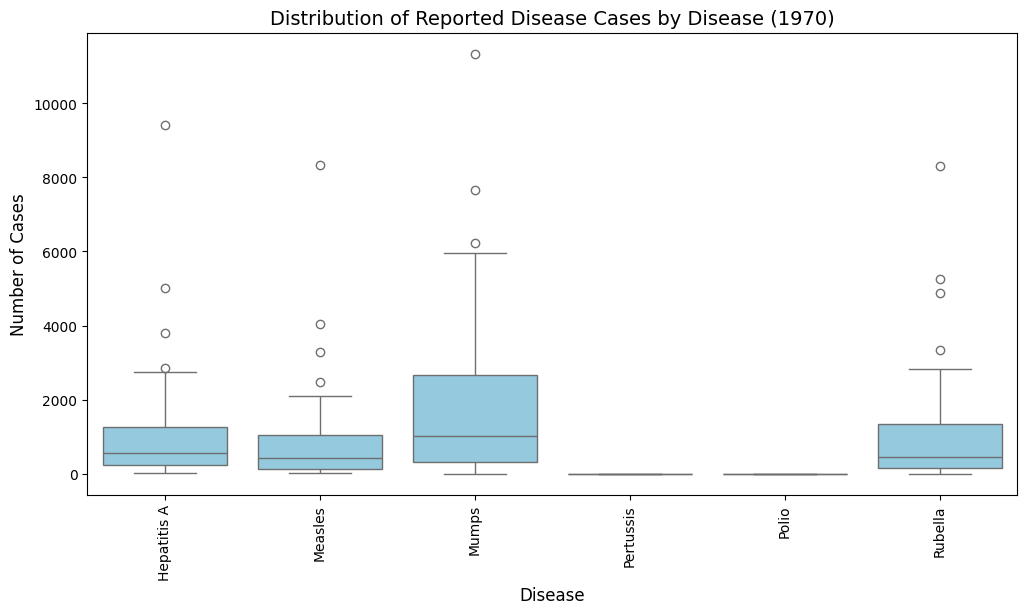

In [ ]:
## Boxplot 2 (Distribution of Reported Cases 1970)
df_1970 = df[df['year'] == 1970]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1970, x='disease', y='count', color='skyblue')
plt.title('Distribution of Reported Disease Cases by Disease (1970)', fontsize=14)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=90)

plt.show()

This box plot shows the distribution of reported contagious disease cases in 1970 for six diseases, Hepatitis A, Measles, Mumps, Pertussis, Polio, and Rubella. Mumps shows the highest number of cases, with outliers reaching above 10,000 cases, indicating that it was the most prevalent disease in1970. Hepatitis A, Measles, and Rubella all show a moderate number of cases with some outliers almost reaching 10000 cases. Pertussis and polio show the fewest number of cases, as the widespread adoption of the combined pertussis and polio vaccine led to the eradication of polio in the United States by 1979.

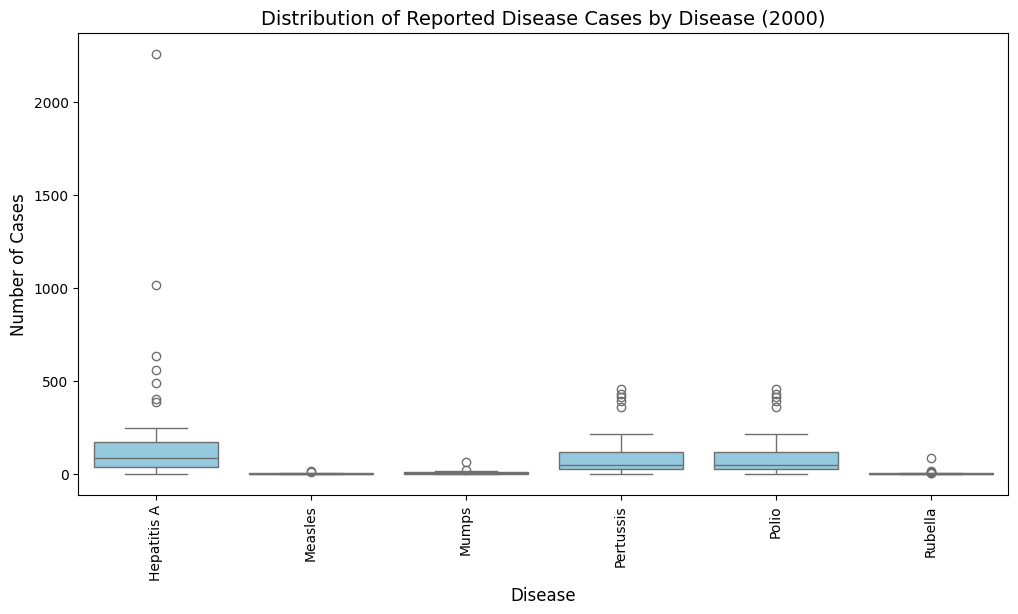

In [ ]:
## Boxplot 3 (Distribution of Reported Cases 2000)
df_2000 = df[df['year'] == 2000]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2000, x='disease', y='count', color='skyblue')
plt.title('Distribution of Reported Disease Cases by Disease (2000)', fontsize=14)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=90)

plt.show()

This box plot shows the distribution of reported contagious disease cases in 2000 for six diseases, Hepatitis A, Measles, Mumps, Pertussis, Polio, and Rubella. Hepatitis A shows the highest number of cases, with one outlier reaching above 2000 cases. Pertussis and Polio show a lower number of cases with some outliers slightly above 500. Measles, Mumps, and Rubella show the fewest number of cases with distributions near zero. This data shows an impressive decline in the number of reported cases of contagious disease compared to both 1950 and 1970. This may reflect the impact of improved hygiene practices and an increase in vaccination.

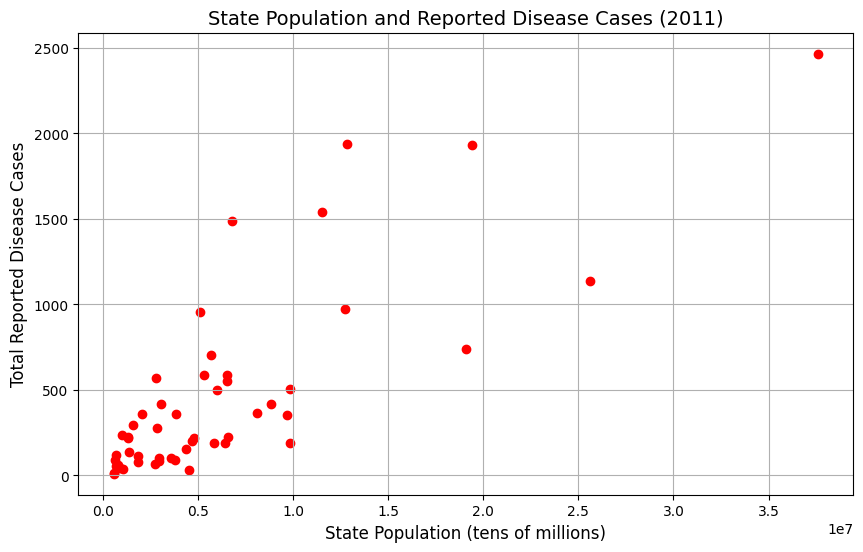

In [ ]:
## Scatterplot (Population vs Total Reported Cases)
latest_year = df['year'].max()
latest_df = df[df['year'] == latest_year]
year_summary = latest_df.groupby('state', as_index=False).agg({'count': 'sum','population': 'max'})
plt.figure(figsize=(10, 6))
plt.scatter(year_summary['population'], year_summary['count'], color='red')
plt.title('State Population and Reported Disease Cases (2011)', fontsize=14)
plt.xlabel('State Population (tens of millions)', fontsize=12)
plt.ylabel('Total Reported Disease Cases', fontsize=12)
plt.grid(True)

plt.show()

This scatter plot shows the relationship between state population and the total number of reported contagious disease cases in 2011. Each point represents a state, with population on the x-axis and total contagious disease cases for 2011 on the y-axis. The graph suggests that there is a positive correlation between a state's population and the total number of reported contagious disease cases.

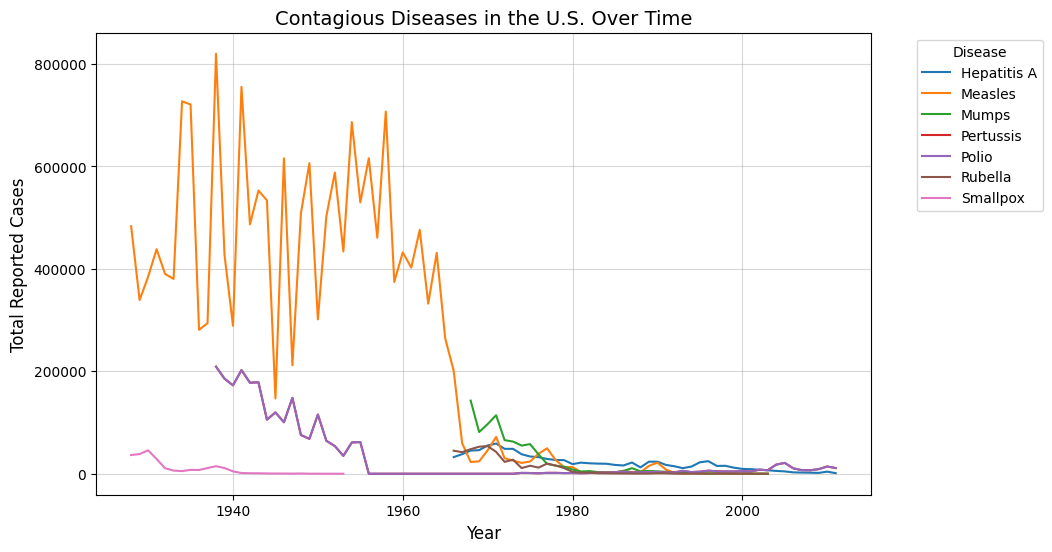

In [ ]:
# Just a line Graph for historical context (Shows a general decline in disease over time)
disease_year = df.groupby(['disease', 'year'], as_index=False)['count'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=disease_year, x='year', y='count', hue='disease')
plt.title('Contagious Diseases in the U.S. Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Reported Cases', fontsize=12)
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

This line graph illustrates the trends over the lifespan of the dataset (1928-2011) of several contagious diseases in the United States. Each line represents a specific disease (Hepatitis A, Measles, Mumps, Pertussis, Polio, Rubella, and Smallpox). Overall the data shows a major decline in all diseases over time, and the complete eradication of Smallpox by the mid 1950's. This may highlight how improved hygiene and vaccination programs have been highly effective in reducing the rate of contracting contagious diseases in the United States.

##Section 4: Random Sampling

In [ ]:
## Simulate a nonparametric inference of the Median for a quantitative variable in the dataset
## sample size should be about 10% of the data. Use random sampling for the rows
sample_size = int(0.1 * len(df))
sample_df = df.sample(n=sample_size, random_state=5)

count_sample = sample_df['count'].dropna()


medians_boot_samples= []
for _ in range(10000):
    resample = np.random.choice(count_sample, size=len(count_sample), replace=True)
    medians_boot_samples.append(np.median(resample))
np.mean(medians_boot_samples)

conf_int = np.percentile(medians_boot_samples, [2.5, 97.5])
median_est = np.mean(medians_boot_samples)

print(f"Estimated Median: {median_est}")
print(f"95% Confidence Interval: ({conf_int[0]}, {conf_int[1]})")

Estimated Median: 47.1006
95% Confidence Interval: (39.0, 57.0)


With 95% confidence we can say that the median count of reported contagious diseases lies between 39 and 57.

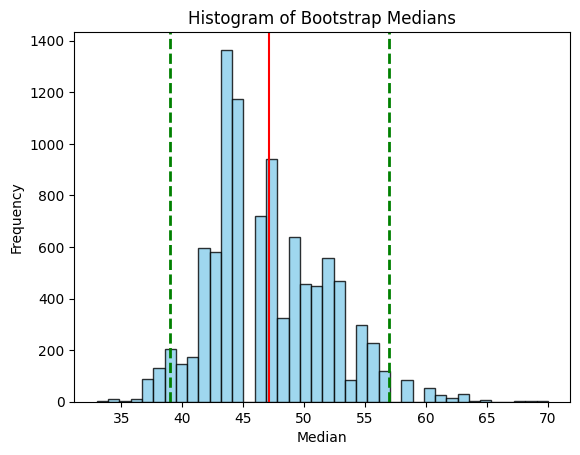

In [ ]:
plt.hist(medians_boot_samples, bins=40, color='skyblue', edgecolor='black', alpha=0.8)
plt.axvline(median_est, color='red')
plt.axvline(conf_int[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(conf_int[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Median')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Medians')
plt.show()

We can say with 95% confidence that the median falls between 39 and 57. There is only a 2.5% chance the median is below the lower bound (39) or above the upper bound (57).

/tmp/ipython-input-2119391981.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


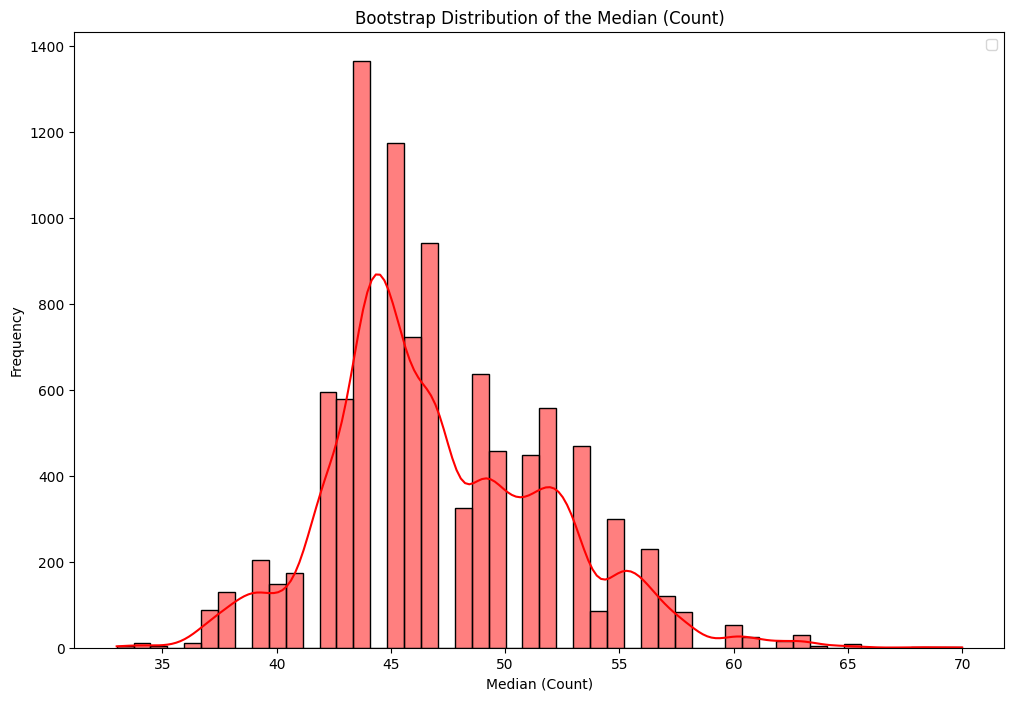

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(medians_boot_samples, bins=50, kde=True, color='red', edgecolor='black')

plt.title('Bootstrap Distribution of the Median (Count)')
plt.xlabel('Median (Count)')
plt.ylabel('Frequency')
plt.legend()

plt.show()